In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix as solve
from plots import plot_pairing_amplitude, plot_density_of_states

In [2]:
# recrod runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve() # NC(50) - SOC(2) - SC(50)
#mu_orbital = -3.5, orbital_indicator = 's', F_sc_initial_orbital = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Hermition:  True
Iteration nr. 1
delta_diff =  71.10217243669865
Iteration nr. 2
delta_diff =  8.738215632956347
Iteration nr. 3
delta_diff =  0.5506047921282229
Iteration nr. 4
delta_diff =  0.8588166061774274
Iteration nr. 5
delta_diff =  0.32112894081383586
Iteration nr. 6
delta_diff =  0.09580887747201922
Iteration nr. 7
delta_diff =  0.026894328253994418
Iteration nr. 8
delta_diff =  0.0073999516185551464
Iteration nr. 9
delta_diff =  0.0020179140104595672
Iteration nr. 10
delta_diff =  0.0005471980937522961
Iteration nr. 11
delta_diff =  0.00014774968815552052
Iteration nr. 12
delta_diff =  3.975186573611288e-05
Time:  106.52041693398496


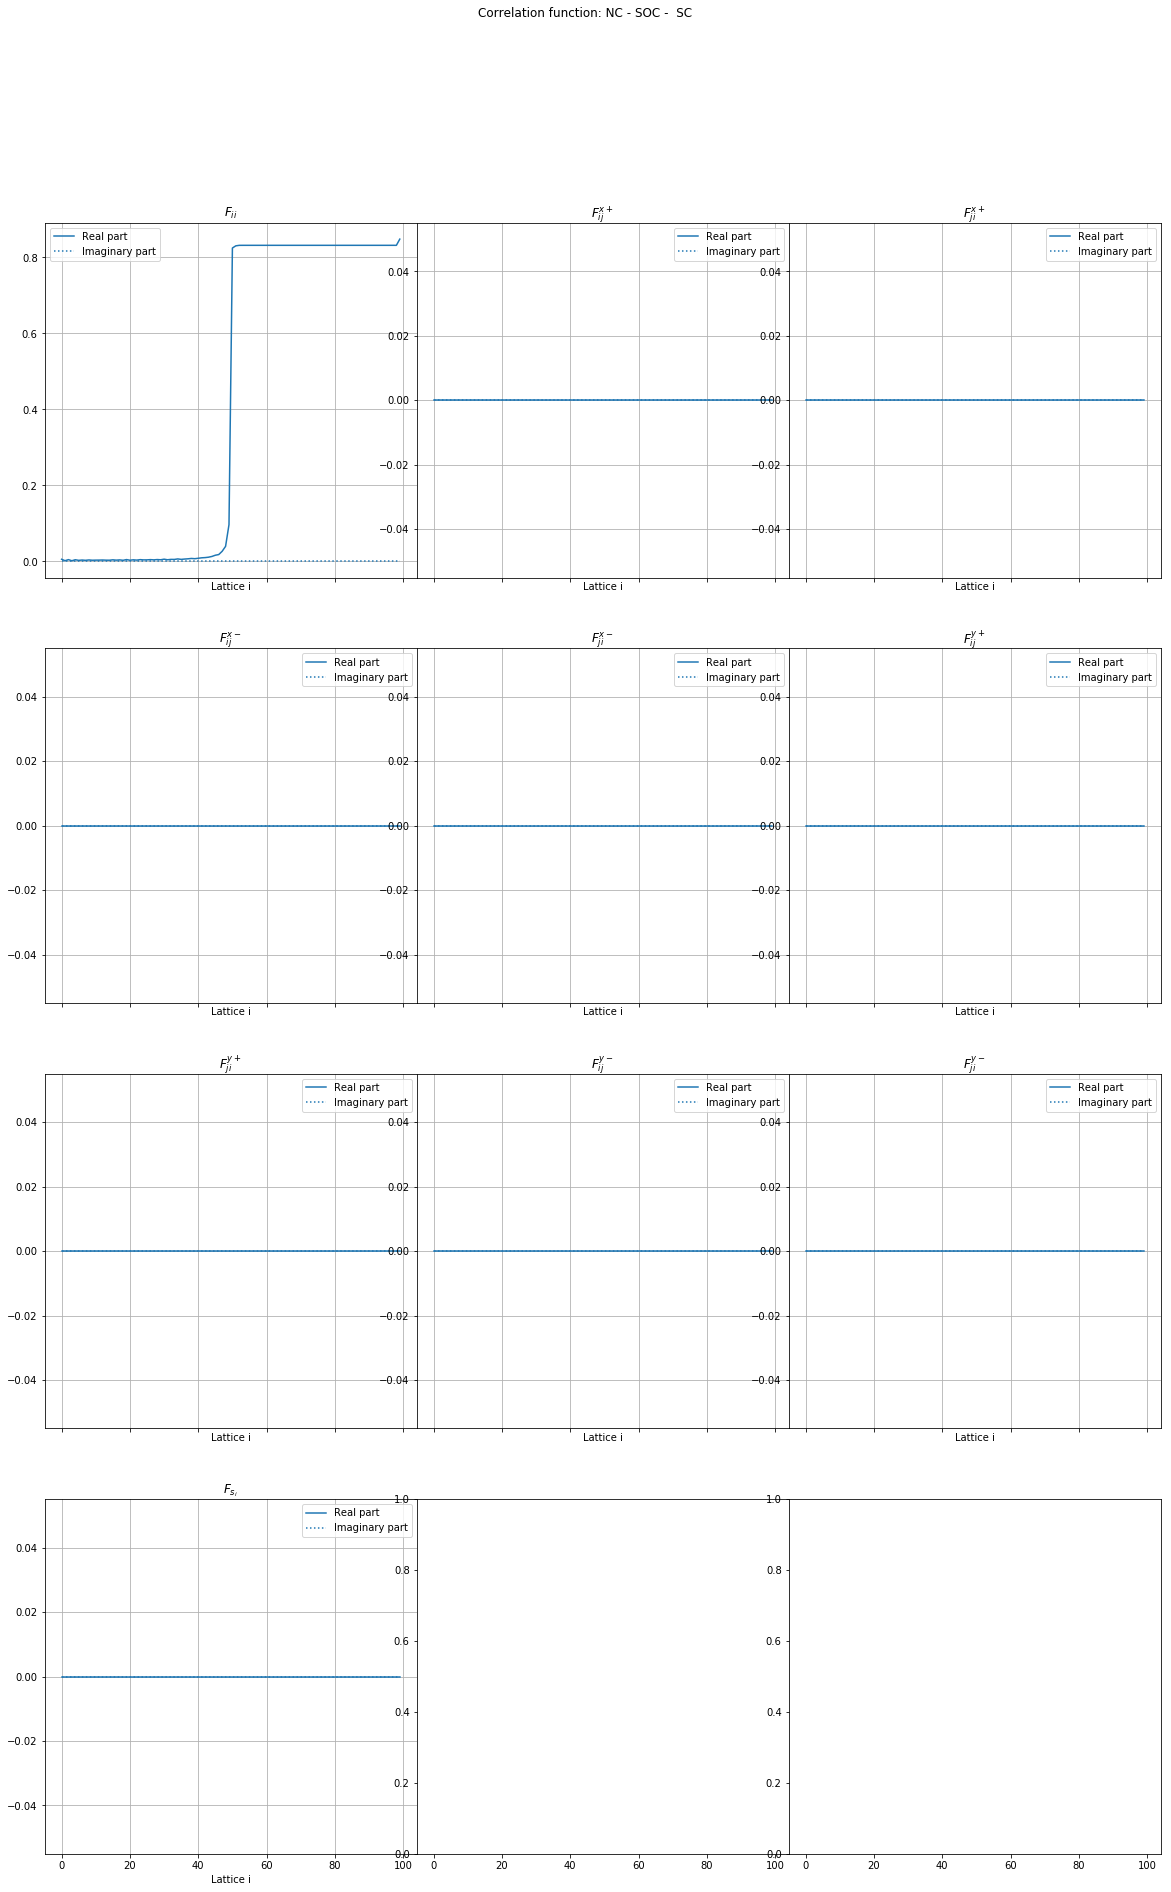

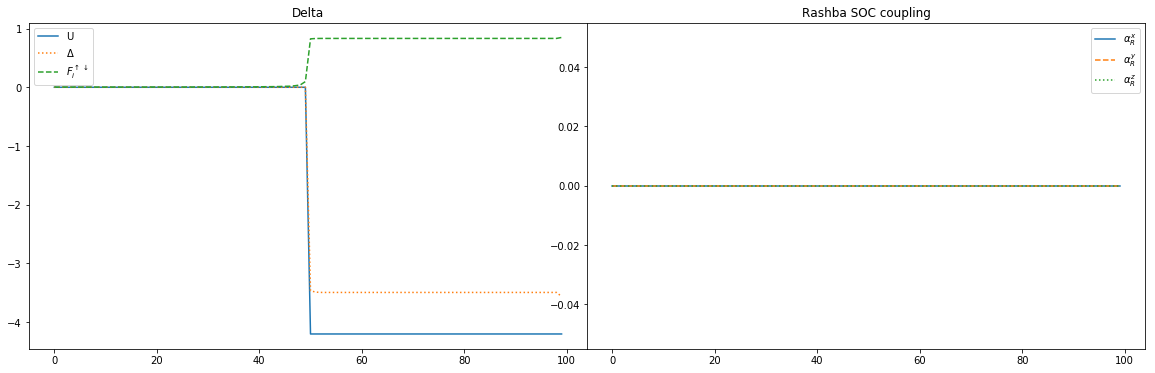

In [3]:
plot_pairing_amplitude(system, F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

In [4]:
# recrod runtime
import timeit
start = timeit.default_timer()

ldos, energy_state = system.ldos_from_problem(0.01, 0.03, -1, 1) # resolution, krenerl size, min e, max e

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  20.62442088397802


In [5]:
print(ldos.shape)
print(energy_state.shape)

(100, 200)
(200,)


(200,)
(100, 200)


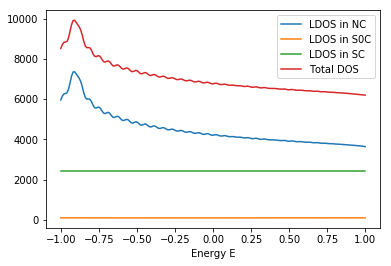

In [6]:
plot_density_of_states(energy_state, ldos)

Text(0,0.5,'#')

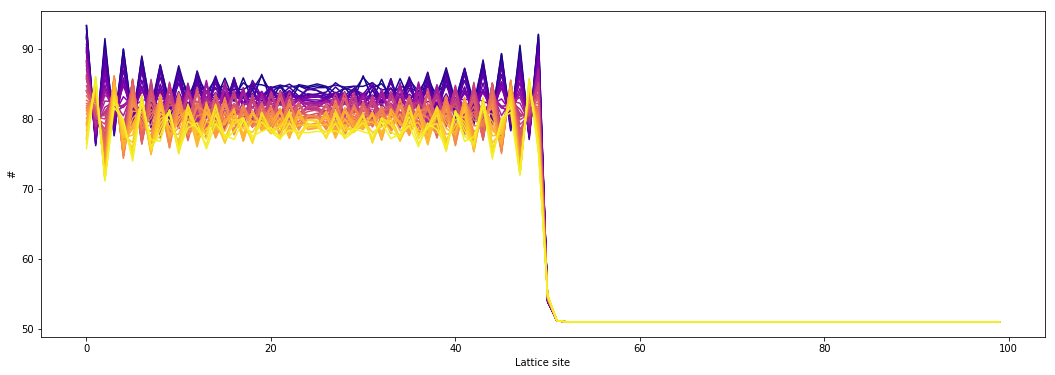

In [7]:
# Try to plot only middle energies


fig = plt.figure(figsize=(18, 6))
num_energies = ldos.shape[1]
step = 1
delta_range = 50
start = num_energies//2
stop = min(num_energies//2+delta_range, num_energies)
for i in range(start, stop, step):
    plt.plot(ldos[:, i], c = cm.plasma(float(i-start)/(stop-start)))
plt.xlabel("Lattice site")
plt.ylabel("#")

Text(0,0.5,'#')

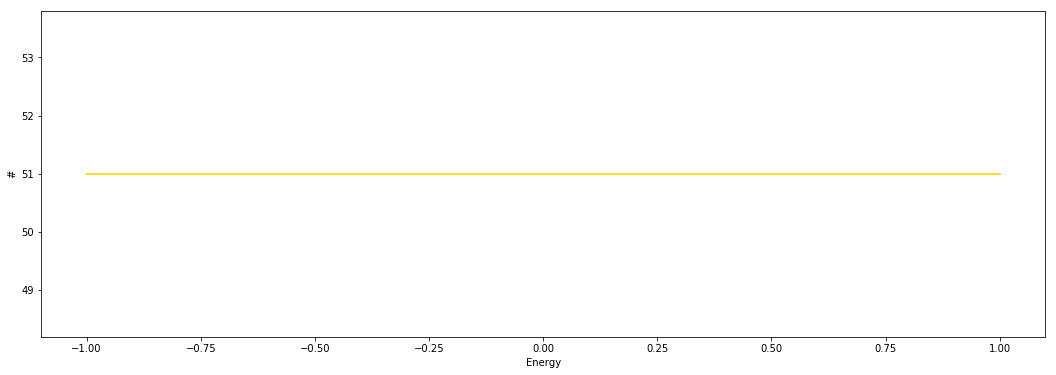

In [8]:
# Try to only plot middle lattice

fig, ax = plt.subplots(figsize=(18, 6))
num_latticesites = ldos.shape[0]
step = 5
delta_range = 50
start = max(num_latticesites//2-delta_range, 0)
stop = min(num_latticesites//2+delta_range, num_latticesites)
#stop = Nx//2
for i in range(start, stop, step):
    ax.plot(energy_state, ldos[i, :], c = cm.plasma(float(i-start)/(stop-start)))
#ax.set_xlim()
ax.set_xlabel("Energy")
ax.set_ylabel("#")

Text(0,0.5,'Energy')

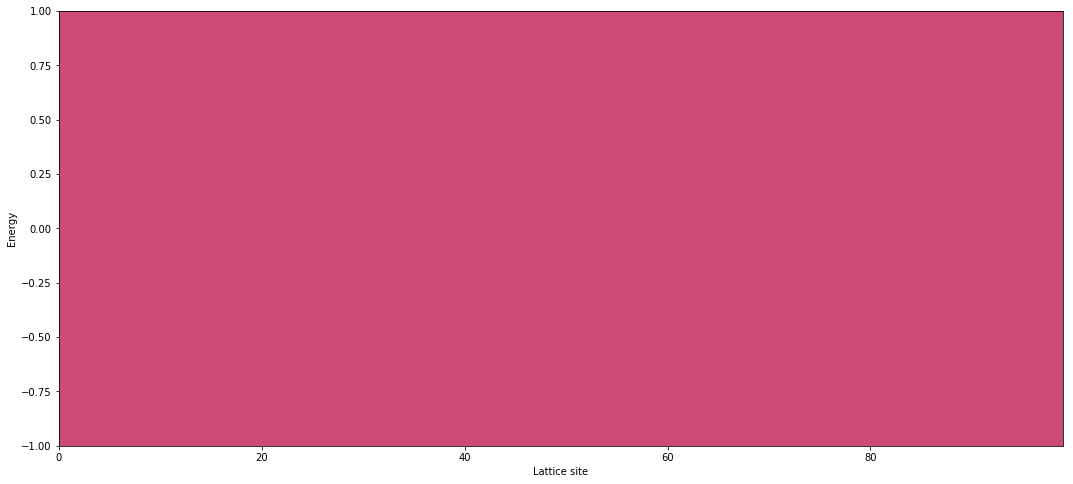

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.contourf(np.arange(ldos.shape[0]), energy_state, ldos.T, cmap=cm.plasma, levels=np.linspace(0, 100, 200))
ax.set_xlabel("Lattice site")
ax.set_ylabel("Energy")

In [10]:
print(system.eigenvalues[:,0])

[-3.38484001 -3.38484001 -3.38359956 -3.38359956 -3.38153385 -3.38153385
 -3.37864542 -3.37864542 -3.37493782 -3.37493782 -3.37041563 -3.37041563
 -3.36508442 -3.36508442 -3.35895075 -3.35895075 -3.35202221 -3.35202221
 -3.34430733 -3.34430733 -3.33581566 -3.33581566 -3.32655768 -3.32655768
 -3.31654486 -3.31654486 -3.30578959 -3.30578959 -3.2943052  -3.2943052
 -3.28210593 -3.28210593 -3.26920693 -3.26920693 -3.25562424 -3.25562424
 -3.24137475 -3.24137475 -3.22647621 -3.22647621 -3.21094721 -3.21094721
 -3.19480711 -3.19480711 -3.1780761  -3.1780761  -3.16077509 -3.16077509
 -3.14292576 -3.14292576 -3.12455048 -3.12455048 -3.1056723  -3.1056723
 -3.08631493 -3.08631493 -3.0665027  -3.0665027  -3.04626052 -3.04626052
 -3.02561387 -3.02561387 -3.00458875 -3.00458875 -2.98321162 -2.98321162
 -2.96150943 -2.96150943 -2.9395095  -2.9395095  -2.91723953 -2.91723953
 -2.89472753 -2.89472753 -2.87200182 -2.87200182 -2.84909091 -2.84909091
 -2.82602353 -2.82602353 -2.80282853 -2.80282853 -2.7

In [10]:
Fs = np.pad(np.array([0.3], dtype=np.complex128),  (0,8), mode='constant', constant_values=0.0)
print(Fs)

[0.3+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


In [10]:
import numpy as np
a = np.ones((5,5))
b = np.ones((5,5))

In [11]:
for i in range(len(a)):
    for j in range(len(a)):
        a[i][j] += i*2 + j
        b[j][i] += i*5+j
        
print(a)
print(b)

[[ 1.  2.  3.  4.  5.]
 [ 3.  4.  5.  6.  7.]
 [ 5.  6.  7.  8.  9.]
 [ 7.  8.  9. 10. 11.]
 [ 9. 10. 11. 12. 13.]]
[[ 1.  6. 11. 16. 21.]
 [ 2.  7. 12. 17. 22.]
 [ 3.  8. 13. 18. 23.]
 [ 4.  9. 14. 19. 24.]
 [ 5. 10. 15. 20. 25.]]


In [17]:
print(a[:,:]*b[:,:])
c = a*b
tmp1 = np.sum(a*b)
tmp = 0
for i in range(len(c)):
    for j in range(len(c[0])):
        tmp += c[i,j]
print(tmp)
print(tmp1)

[[  1.  12.  33.  64. 105.]
 [  6.  28.  60. 102. 154.]
 [ 15.  48.  91. 144. 207.]
 [ 28.  72. 126. 190. 264.]
 [ 45. 100. 165. 240. 325.]]
2625.0
2625.0


In [16]:
a1, a2 = np.where(a>= 5.0)
print(a1)
print(a2)

[1 1 2 2 2 2 3 3 3 3]
[2 3 0 1 2 3 0 1 2 3]


In [17]:
for i in range(len(a1)):
    print(a[a1[i]][a2[i]])

5.0
6.0
5.0
6.0
7.0
8.0
7.0
8.0
9.0
10.0


In [12]:
a[2:,2:]

array([[ 7.,  8.],
       [ 9., 10.]])

In [6]:
np.tanh(b[2,:])

array([0.99505475, 0.99999977, 1.        , 1.        , 1.        ])

In [15]:
np.sum(a[0,:]*b[2,:])

245.0

In [14]:
np.matmul(a[0,:],b[2,:])

245.0